<a href="https://colab.research.google.com/github/azu-akari/portfolio/blob/main/Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Project Name    : Machine Learning
 
 File Name       : Trial.ipynb
 
 Creation Date   : Jun 9 2021
 
 Copyright (c) 2021 KAMAKE no SUSUME. All rights reserved.
 
 This source code or any portion thereof must not be reproduced or used in any manner whatsoever.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab/Trial

/content/drive/MyDrive/Colab/Trial


In [ ]:
%ls

datasets/  prepare_images.py  target_datasets/  Trial.ipynb  visualize.py


コメントを入力できるよ

In [ ]:
#コードもかけるよ

In [ ]:
%ls

datasets/  prepare_images.py  Trial.ipynb  visualize.py


In [ ]:
%cd datasets

/content/drive/MyDrive/Colab/Trial/datasets


In [ ]:
%ls

dice_top_crop/


In [ ]:
%cd dice_top_crop/

/content/drive/MyDrive/Colab/Trial/datasets/dice_top_crop


In [ ]:
%ls

1/  2/  3/  4/  5/  6/


In [ ]:
%cd 1

/content/drive/MyDrive/Colab/Trial/datasets/dice_top_crop/1


In [ ]:
%ls

IMG_20210418_174644.jpg  IMG_20210418_180532.jpg  IMG_20210418_180552.jpg
IMG_20210418_174655.jpg  IMG_20210418_180536.jpg  IMG_20210418_180555.jpg
IMG_20210418_174712.jpg  IMG_20210418_180539.jpg  IMG_20210418_180557.jpg
IMG_20210418_174728.jpg  IMG_20210418_180543.jpg  IMG_20210418_180600.jpg
IMG_20210418_175049.jpg  IMG_20210418_180546.jpg
IMG_20210418_175052.jpg  IMG_20210418_180549.jpg


さいころの1の画像が16枚あることが確認できた

In [ ]:
%run prepare_images.py datasets/dice_top_crop
#画像を訓練用：検証用＝４：１に分割

ERROR:root:File `'prepare_images.py'` not found.


In [ ]:
%ls

datasets/  prepare_images.py  target_datasets/  Trial.ipynb  visualize.py


In [ ]:
%cd target_datasets/

/content/drive/MyDrive/Colab/Trial/target_datasets


In [ ]:
%ls

train/  val/


In [ ]:
%cd train

/content/drive/MyDrive/Colab/Trial/target_datasets/train


In [ ]:
%ls

1/  2/  3/  4/  5/  6/


train(訓練用)とval(検証用)に分割できた

In [ ]:
#各種ライブラリのインポート
#tensorflow 機械学習のライブラリ
#keras 画像認識のためのライブラリ
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import shutil
import math
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
#可視化用コードのインポート
import visualize

#テンソーフローのバージョンを確認
print("tf version=")
print(tf.__version__)

train_dir = 'target_datasets/train'
val_dir = 'target_datasets/val'

backup_dir = './model'

#labelのリストを作成.ディレクトリ名からラベルを持ってきている
labels = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
    shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

#ラベルリストをファイルに保存
with open(backup_dir + '/labels.txt','w') as f:
    for label in labels:
        f.write(label+"\n")

#クラス数（ラベルの数）を取得
NUM_CLASSES = len(labels)
print("class number=" + str(NUM_CLASSES))

#ファイルからラベルを読み込んで再度ラベルリストを作成
labels = []
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
print(labels)

2.8.2
class number=6
['1', '2', '3', '4', '5', '6']


Found 72 images belonging to 6 classes.
Found 22 images belonging to 6 classes.
## Train Data Sample ##


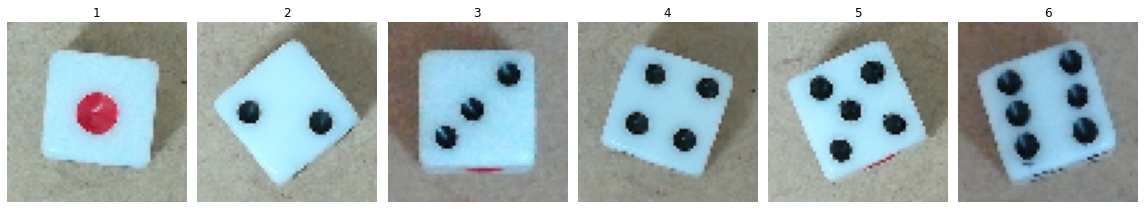

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         224       
                                                                 
 activation_4 (Activation)   (None, 64, 64, 8)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 8)         584       
                                                                 
 activation_5 (Activation)   (None, 62, 62, 8)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 8)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7688)              0         
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/12
9/9 [==============================] - 1s 72ms/step - loss: 2.1041 - accuracy: 0.1250 - val_loss: 1.7761 - val_accuracy: 0.1818
Epoch 2/12
9/9 [==============================] - 0s 45ms/step - loss: 1.7721 - accuracy: 0.2917 - val_loss: 1.7543 - val_accuracy: 0.2273
Epoch 3/12
9/9 [==============================] - 0s 45ms/step - loss: 1.6867 - accuracy: 0.3333 - val_loss: 1.6566 - val_accuracy: 0.3636
Epoch 4/12
9/9 [==============================] - 0s 45ms/step - loss: 1.6032 - accuracy: 0.3056 - val_loss: 1.6058 - val_accuracy: 0.3636
Epoch 5/12
9/9 [==============================] - 0s 45ms/step - loss: 1.4455 - accuracy: 0.4583 - val_loss: 1.4582 - val_accuracy: 0.6364
Epoch 6/12
9/9 [==============================] - 0s 47ms/step - loss: 1.2521 - accuracy: 0.7222 - val_loss: 1.2824 - val_accuracy: 0.5455
Epoch 7/12
9/9 [==============================] - 0s 44ms/step - loss: 1.0336 - accuracy: 0.7361 - val_loss: 1.1370 - val_accuracy: 0.5455
Epoch 8/12
9/9 [===========

In [ ]:
#各種パラメータの設定（ここらへんを調整するよ）
# 学習率.誤差の傾きに応じてどれだけ修正するのかの比例定数
LEARNING_RATE = 0.001
# エポック（世代数）.何回学習を行うのか
EPOCHS = 12
# バッチサイズ.何枚ずつ学習を行うのか
BATCH_SIZE = 8
#モデルとしてどのくらいの画像のサイズ（64×64）.読み込む画像のサイズを決めることができる
IMAGE_SIZE = 64

#画像生成の設定（ここらへんも調整するよ）
#どんな風に画像を読み込むのか決めることができる,RBGは0~255なので割ることで正規化している
train_data_gen = ImageDataGenerator(rescale=1./255)
#train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=180)
val_data_gen = ImageDataGenerator(rescale=1./255)


# メモ：ImageDataGenerator.flow_from_directory はIteratorを返す
#訓練データの生成用のイテレータの取得
train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    #画像データの読み込む順番によって訓練が依存するので順番をシャッフルする
    class_mode='categorical', shuffle=True)

validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False)

# Display train data sample
#入力画像のうち各ラベル1枚ずつ表示
visualize.pick_train_sample(labels, train_data)

#以下からが学習モデルの構築
# AI model definition
#線形（Sequential）モデルの設定
model = Sequential()

#隠れ層の定義
#convlution2D：畳み込み層
model.add(Conv2D(8, (3, 3), padding='same',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
#活性化関数を設定
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

#最適化アルゴリズムの設定.Adamが誤差勾配法を表す
opt = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
#opt = tf.keras.optimizers.SGD(lr=LEARNING_RATE)

#訓練モデルの構築
model.compile(opt, loss='categorical_crossentropy',
    metrics=['accuracy'])

#モデル（隠れ層）のサマライズ
model.summary()

#学習の実行
# Execute train
history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)

#損失lossと精度accuracyの表示
score = model.evaluate(validation_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Prediction data
[[0.981 0.012 0.007 0.001 0.    0.   ]
 [0.951 0.012 0.036 0.    0.    0.   ]
 [0.96  0.006 0.033 0.    0.    0.   ]
 [0.972 0.004 0.024 0.    0.    0.   ]
 [0.012 0.484 0.107 0.382 0.005 0.01 ]
 [0.01  0.529 0.058 0.392 0.004 0.007]
 [0.039 0.451 0.23  0.269 0.005 0.006]
 [0.021 0.534 0.129 0.298 0.007 0.011]
 [0.055 0.228 0.651 0.014 0.05  0.001]
 [0.024 0.159 0.624 0.01  0.178 0.005]
 [0.004 0.034 0.756 0.004 0.2   0.002]
 [0.006 0.021 0.847 0.002 0.121 0.002]
 [0.004 0.277 0.076 0.453 0.022 0.169]
 [0.005 0.468 0.023 0.421 0.007 0.076]
 [0.002 0.133 0.06  0.395 0.022 0.388]
 [0.    0.184 0.011 0.747 0.005 0.052]
 [0.002 0.006 0.666 0.003 0.284 0.039]
 [0.002 0.031 0.452 0.018 0.455 0.041]
 [0.001 0.014 0.547 0.014 0.367 0.057]
 [0.001 0.15  0.038 0.685 0.014 0.111]
 [0.    0.039 0.009 0.185 0.025 0.742]
 [0.    0.027 0.005 0.237 0.025 0.706]]
(22, 6)
#0 Expected:1 -> Predicted:1
File: 1/IMG_20210418_174712.jpg
Each Prediction Value: [0.981 0.012 0.007 0.001 0.    0.

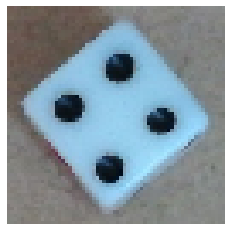

#14 Expected:4 -> Predicted:4
File: 4/IMG_20210418_180719.jpg
Each Prediction Value: [0.002 0.133 0.06  0.395 0.022 0.388]
* Correct *
#15 Expected:4 -> Predicted:4
File: 4/IMG_20210418_180736.jpg
Each Prediction Value: [0.    0.184 0.011 0.747 0.005 0.052]
* Correct *
#16 Expected:5 -> Predicted:3
File: 5/IMG_20210418_174918.jpg
Each Prediction Value: [0.002 0.006 0.666 0.003 0.284 0.039]
**** INCORRECT ****


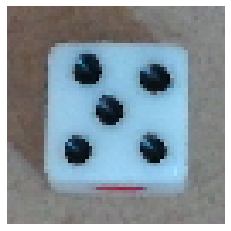

#17 Expected:5 -> Predicted:5
File: 5/IMG_20210418_174930.jpg
Each Prediction Value: [0.002 0.031 0.452 0.018 0.455 0.041]
* Correct *
#18 Expected:5 -> Predicted:3
File: 5/IMG_20210418_180820.jpg
Each Prediction Value: [0.001 0.014 0.547 0.014 0.367 0.057]
**** INCORRECT ****


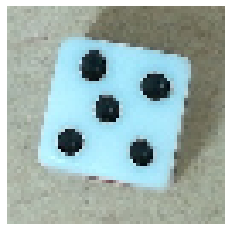

#19 Expected:6 -> Predicted:4
File: 6/IMG_20210418_174953.jpg
Each Prediction Value: [0.001 0.15  0.038 0.685 0.014 0.111]
**** INCORRECT ****


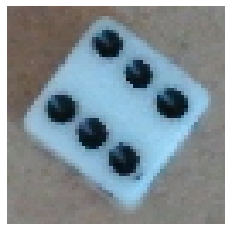

#20 Expected:6 -> Predicted:6
File: 6/IMG_20210418_180830.jpg
Each Prediction Value: [0.    0.039 0.009 0.185 0.025 0.742]
* Correct *
#21 Expected:6 -> Predicted:6
File: 6/IMG_20210418_180859.jpg
Each Prediction Value: [0.    0.027 0.005 0.237 0.025 0.706]
* Correct *
Loss


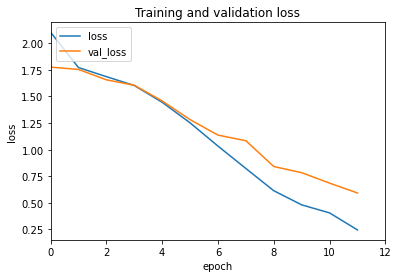

Accuracy


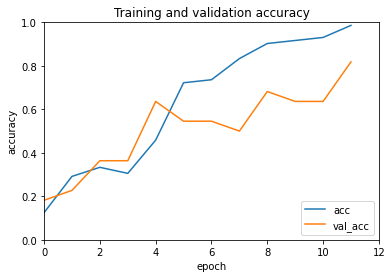

Confusion Matrix


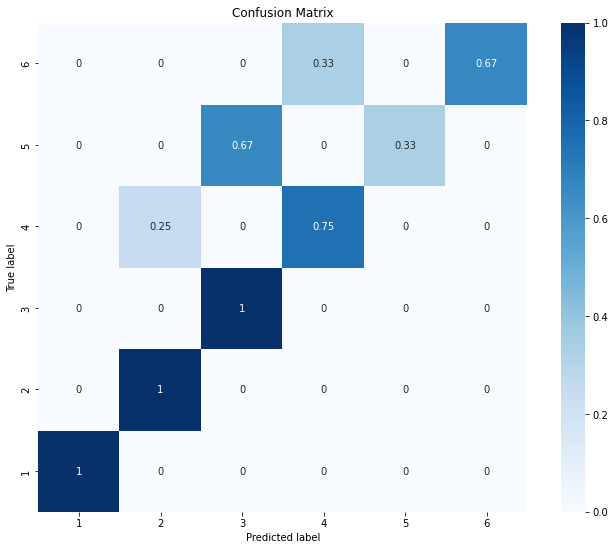

In [ ]:
# Failed pictures
#誤認識した画像の表示
visualize.vis_failed_pic(model, labels, validation_data, val_dir, BATCH_SIZE, 100)

# Visualize loss
#損失と精度の時系列表示
visualize.vis_loss_accuracy(history, EPOCHS)

# Save model
#学習済みモデルをファイルに保存
save_model_path = os.path.join(backup_dir, 'my_model.h5')
model.save(save_model_path)

# Confusion Matrix
#混合行列（confusion matrix）の表示
visualize.vis_confusion_matrix(model, validation_data)

#Loss：
正解値とモデルによる出力された予測値とのズレ  
右下がりのグラフになることを期待する  
青：訓練段階のlossの表示  
オレンジ：評価段階のlossの表示   
→私達はオレンジ（評価）のラインが下がることを期待する  

#Accuracy：
正解率＝(TP+TN)/(TP+TN+FP+FN)  
オレンジ（評価）のラインが１に近づくことを期待する  

#混合行列  
対角成分がすべて１になることを期待する


Visualize filter: conv2d


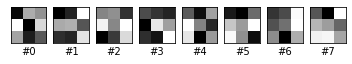

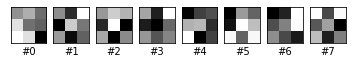

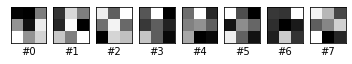

Visualize filter: conv2d_1


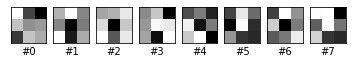

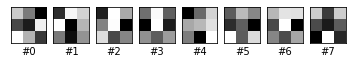

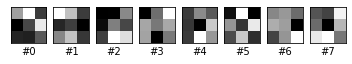

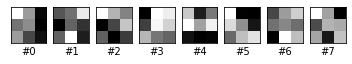

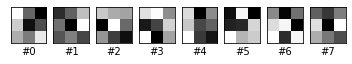

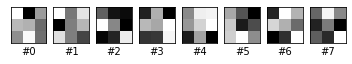

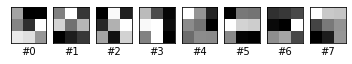

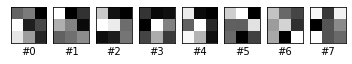

In [ ]:
visualize.vis_filter(model, 'conv2d')
visualize.vis_filter(model, 'conv2d_1')

In [ ]:
!cat incorrect.txt

target_datasets/val/2/IMG_20210418_174744.jpg
target_datasets/val/4/IMG_20210418_174849.jpg
target_datasets/val/4/IMG_20210418_174910.jpg
target_datasets/val/4/IMG_20210418_180742.jpg
target_datasets/val/5/IMG_20210418_174930.jpg
target_datasets/val/5/IMG_20210418_174937.jpg
target_datasets/val/6/IMG_20210418_180830.jpg
target_datasets/val/6/IMG_20210418_180848.jpg


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 8)         224       
                                                                 
 activation (Activation)     (None, 64, 64, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 8)         584       
                                                                 
 activation_1 (Activation)   (None, 62, 62, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7688)              0         
                                                        

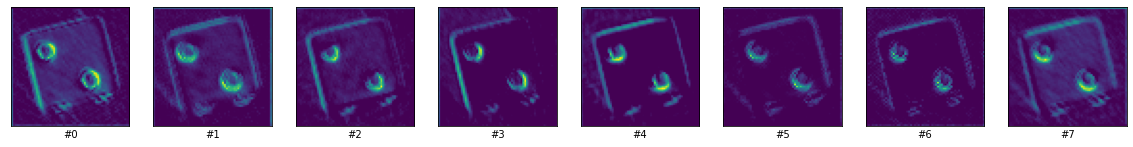

target_datasets/val/4/IMG_20210418_174849.jpg


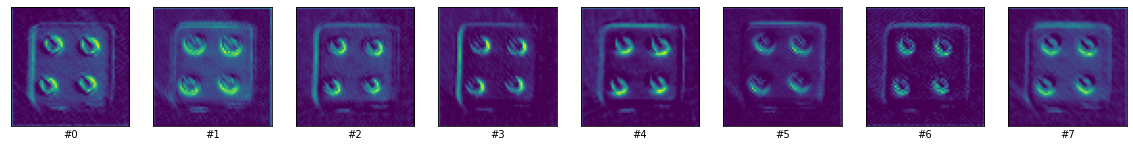

target_datasets/val/4/IMG_20210418_174910.jpg


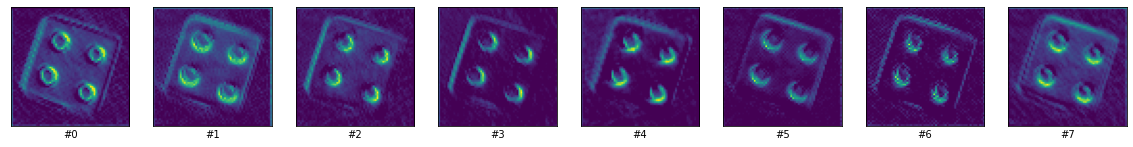

target_datasets/val/4/IMG_20210418_180742.jpg


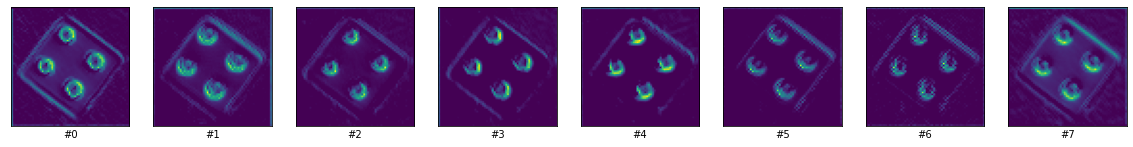

target_datasets/val/5/IMG_20210418_174930.jpg


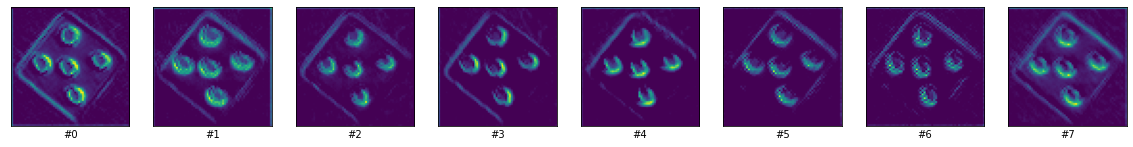

target_datasets/val/5/IMG_20210418_174937.jpg


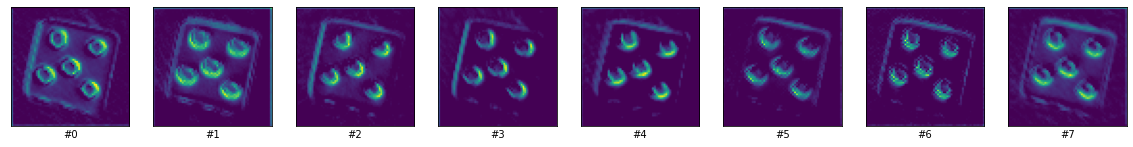

target_datasets/val/6/IMG_20210418_180830.jpg


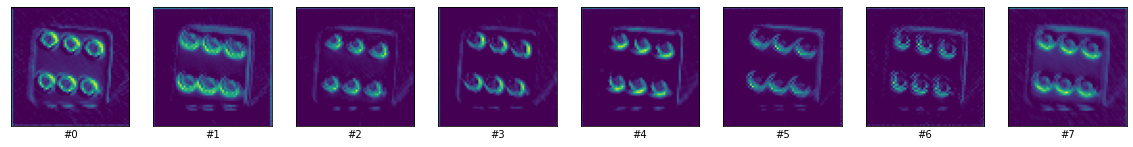

target_datasets/val/6/IMG_20210418_180848.jpg


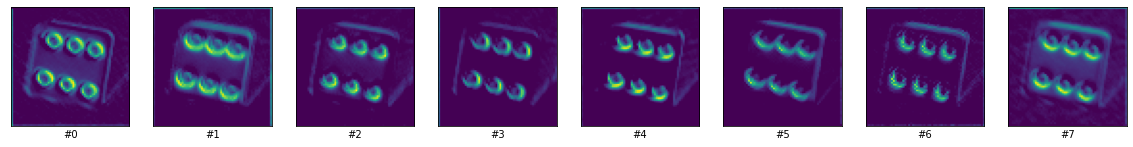

In [ ]:
visualize.vis_hidden_layer('incorrect.txt', 'activation_1', IMAGE_SIZE)